<a href="https://colab.research.google.com/github/deepakk177/ML---Lab-Programs-MTech-AI-2025-/blob/main/Machine_Learning_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab 7**


**Name** : Deepak Singh Porte

**Scholar Number** : 25215011122

Question 1. Dataset: Mall Customers Dataset
 Question 1: Silhouette Score Analysis using K-Means++ Tasks:
 1. Load the Mall Customers dataset and extract only the numeric features Annual Income (k$) and Spending Score (1-100).
 2. Apply K-Means++ clustering for values of k = 2 to 10.
 3. For each k, compute and record the average silhouette score.
 4. Plot the silhouette score vs. number of clusters (k).
 5. Identify the k value that gives the highest silhouette score
 6. Additionally, plot the silhouette distribution for k = 2, 4, and 6

k = 2, Silhouette Score = 0.2966
k = 3, Silhouette Score = 0.4673
k = 4, Silhouette Score = 0.4928
k = 5, Silhouette Score = 0.5535
k = 6, Silhouette Score = 0.5375
k = 7, Silhouette Score = 0.4524
k = 8, Silhouette Score = 0.4561
k = 9, Silhouette Score = 0.4371
k = 10, Silhouette Score = 0.4110


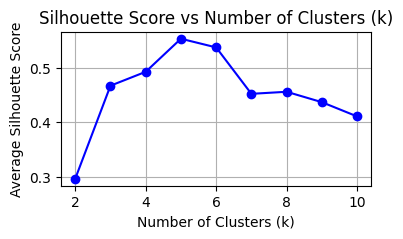


✅ The best number of clusters (k) is 5 with silhouette score 0.5535


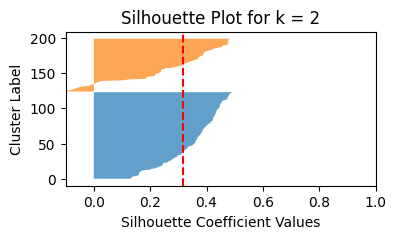

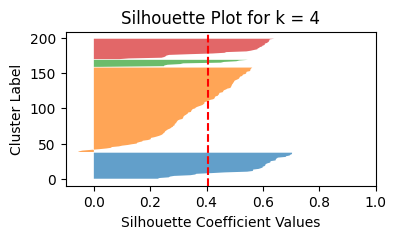

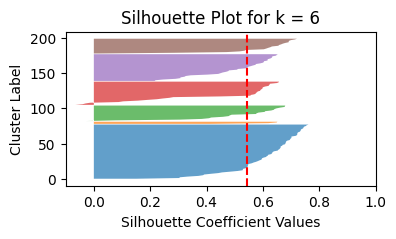

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/sample_data/Mall_Customers.csv.csv")
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

def kmeans_plusplus(X, k):
    n = len(X)
    centroids = [X[np.random.randint(n)]]

    for _ in range(1, k):
        distances = np.array([min(np.sum((x - c)**2) for c in centroids) for x in X])
        probs = distances / distances.sum()
        centroids.append(X[np.random.choice(n, p=probs)])

    return np.array(centroids)

def kmeans(X, k, max_iters=100):
    centroids = kmeans_plusplus(X, k)

    for _ in range(max_iters):
        # Assign clusters
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

def silhouette_score(X, labels):
    n = len(X)
    k = len(np.unique(labels))
    scores = []

    for i in range(n):
        cluster = labels[i]
        same_cluster = X[labels == cluster]

        # a: mean distance to points in same cluster
        a = np.mean([np.linalg.norm(X[i] - x) for x in same_cluster if not np.array_equal(X[i], x)]) if len(same_cluster) > 1 else 0

        # b: min mean distance to points in other clusters
        b = min([np.mean([np.linalg.norm(X[i] - x) for x in X[labels == c]])
                for c in range(k) if c != cluster])

        scores.append((b - a) / max(a, b) if max(a, b) > 0 else 0)

    return np.mean(scores), np.array(scores)

# Apply K-Means++ for k = 2 to 10
silhouette_scores = []
for k in range(2, 11):
    labels, _ = kmeans(X, k)
    score, _ = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Plot Silhouette Score vs k
plt.figure(figsize=(4, 2))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

# Best k
best_k = np.argmax(silhouette_scores) + 2
print(f"\n✅ The best number of clusters (k) is {best_k} with silhouette score {max(silhouette_scores):.4f}")

# Plot Silhouette Distribution for k = 2, 4, 6
for k in [2, 4, 6]:
    labels, _ = kmeans(X, k)
    avg_score, silhouette_vals = silhouette_score(X, labels)

    fig, ax = plt.subplots(figsize=(4, 2))
    y_lower = 0

    for i in range(k):
        cluster_vals = silhouette_vals[labels == i]
        cluster_vals.sort()
        y_upper = y_lower + len(cluster_vals)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7)
        y_lower = y_upper

    ax.axvline(avg_score, color="red", linestyle="--")
    ax.set_title(f"Silhouette Plot for k = {k}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.set_xlim([-0.1, 1])
    plt.show()

Question 2: Elbow Method for Optimal Cluster Selection
Tasks:
1. Apply standard K-Means clustering for k = 1 to 12.
2. For each k, compute the Within-Cluster Sum of Squares (WCSS).
3. Plot the Elbow Curve (WCSS vs. k).
4. Identify the “elbow point” visually where the rate of decrease in
WCSS slows down.
5. Compare whether the optimal cluster number obtained from the
Elbow method aligns with that from the silhouette analysis in Question 1.

k = 1, WCSS = 269981.28
k = 2, WCSS = 181363.60
k = 3, WCSS = 106348.37
k = 4, WCSS = 73679.79
k = 5, WCSS = 44448.46
k = 6, WCSS = 37564.94
k = 7, WCSS = 31280.90
k = 8, WCSS = 25063.65
k = 9, WCSS = 21826.94
k = 10, WCSS = 20298.39
k = 11, WCSS = 19324.98
k = 12, WCSS = 16426.16


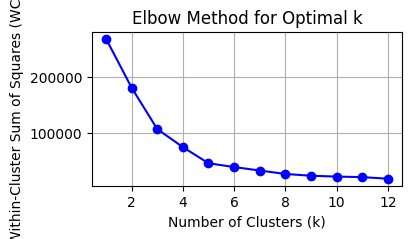

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load the dataset
data = pd.read_csv("/content/sample_data/Mall_Customers.csv.csv")

# Extract the same features as before
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Compute WCSS for k = 1 to 12
wcss = []

for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)  # standard K-Means
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

    print(f"k = {k}, WCSS = {kmeans.inertia_:.2f}")

# 3. Plot the Elbow Curve (WCSS vs. k)
plt.figure(figsize=(4,2))
plt.plot(range(1, 13), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Question 3: Comparison of Initialization Techniques
Tasks:
1. For a fixed number of clusters k = 5, run both:

* K-Means with random initialization, and
* K-Means++ initialization.
2. For each method, record:

* Final WCSS

* Average silhouette score

* Number of iterations until convergence

3. Plot and compare the cluster visualizations for both initialization
methods.

K-Means (Random Initialization)
Final WCSS: 44448.46
Average Silhouette Score: 0.5539
Number of Iterations until convergence: 9

K-Means++ Initialization
Final WCSS: 44448.46
Average Silhouette Score: 0.5539
Number of Iterations until convergence: 4



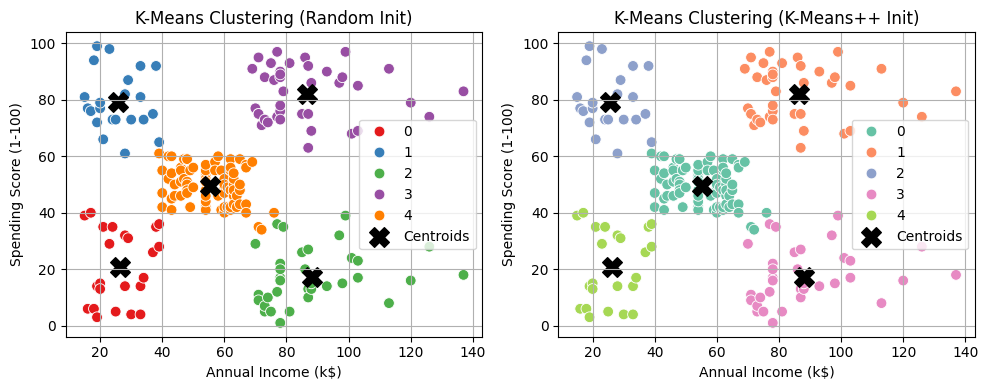

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# 1. Load the dataset
data = pd.read_csv("/content/sample_data/Mall_Customers.csv.csv")
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Set number of clusters
k = 5

# 2. K-Means with random initialization
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
labels_random = kmeans_random.fit_predict(X)
wcss_random = kmeans_random.inertia_
silhouette_random = silhouette_score(X, labels_random)
iterations_random = kmeans_random.n_iter_

print("K-Means (Random Initialization)")
print(f"Final WCSS: {wcss_random:.2f}")
print(f"Average Silhouette Score: {silhouette_random:.4f}")
print(f"Number of Iterations until convergence: {iterations_random}\n")

# 3. K-Means++ initialization
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels_plus = kmeans_plus.fit_predict(X)
wcss_plus = kmeans_plus.inertia_
silhouette_plus = silhouette_score(X, labels_plus)
iterations_plus = kmeans_plus.n_iter_

print("K-Means++ Initialization")
print(f"Final WCSS: {wcss_plus:.2f}")
print(f"Average Silhouette Score: {silhouette_plus:.4f}")
print(f"Number of Iterations until convergence: {iterations_plus}\n")

# 4. Cluster visualization comparison
plt.figure(figsize=(10, 4))

# Random Initialization plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=labels_random, palette='Set1', s=60)
plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering (Random Init)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)

# K-Means++ plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'],
                hue=labels_plus, palette='Set2', s=60)
plt.scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering (K-Means++ Init)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
